# Creating a Wordcloud with US Baby Names
### Visualizing Textual Data in Python

## Introduction
WordCloud is a great way of displaying word frequency. We can visualize and highlight the text-based data by customizing it to fit our needs.
In the notebook below, we will create a word cloud to analyze baby names in the USA to see trending baby names from the year 2000.

**Dataset:**
The US authorities have registered the names of all US citizens born since 1880. The record is publicly available. For data protection reasons, only names that have been used at least 5 times are listed in the data record. We will download the data from [here](https://www.ssa.gov/oact/babynames/limits.html) and take the "National data" dataset.


To get started making a word cloud in Python, we will need some packages below:
- `pandas`: It is a data analysis and manipulation library that provides data structures and tools.
- `numpy`: It is a numerical computing library that provides support for large, multi-dimensional arrays and mathematical functions.
- `matplotlib.pyplot`: It is a plotting library for creating visualizations in Python.
- `wordcloud`: It provides functionality to create word clouds, visual representations of text data.
- `PIL, Image`: It is the Python Imaging Library, which provides image processing capabilities.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [2]:
# Read and glance a one-year-data (you need to provide the related file path where your files saved)
year_2000 = pd.read_csv('./data/yob2000.txt')

year_2000.head(10)

,Emily,F,25959
0,Hannah,F,23086
1,Madison,F,19968
2,Ashley,F,17998
3,Sarah,F,17713
4,Alexis,F,17631
5,Samantha,F,17264
6,Jessica,F,15711
7,Elizabeth,F,15116
8,Taylor,F,15079
9,Lauren,F,14176


There are no missing values in the original dataset, before we start we can check this with `.info()`.

In [3]:
year_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29776 entries, 0 to 29775
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Emily   29776 non-null  object
 1   F       29776 non-null  object
 2   25959   29776 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 698.0+ KB


Since in the original dataset, there is no header, we need to add appropriate headers while reading txt files. So, it can look like below:

| # | Column | Dtype | Description |
| ---- | ---- | ---- | ---- |
| 0 | `name` | int64 | name |
| 1 | `gender` | int64 | gender - `F`: Female, `M`: Male |
| 2 | `frequency` | int64 | frequency of the name in that year  |

Also, we need to create a combined dataset for the selected years we want to investigate.

In [4]:
# Create a function to read the txt file for a selected year
def parse_dataset(year):
    path = f'./data/yob{year}.txt'
    df = pd.read_csv(path, names = ['name', 'gender', 'frequency'])
    return df

In [5]:
# Combine yearly datasets in a for loop and add year info into the dataset
# Since we are interested in data from 2000 and later, we can identify start_year as 2000 and end_year as 2024
df = pd.DataFrame(columns= ['name', 'gender', 'frequency'])
start_year = 2000
end_year = 2024

for year in range(start_year, end_year):
    df_temp = parse_dataset(year)
    df_temp['year'] = year
    df = pd.concat([df, df_temp], ignore_index=True)

df['year'] = df['year'].astype(int)

In [6]:
# Glance at the new combined dataset
df.sample(15)

,name,gender,frequency,year
692444,Mirai,F,40,2021
747376,Fuller,M,8,2022
710260,Jaison,M,27,2021
697755,Christopher,F,11,2021
713083,Cavani,M,12,2021
580366,Shannon,M,79,2017
157129,Marly,F,48,2005
100289,Yeslin,F,11,2003
435176,Lilybeth,F,15,2013
463398,Cailynn,F,59,2014


Since we need the number of total frequencies for each name, regardless of the year we sum frequencies by grouping names. We save it as a new DataFrame `name_data`.

In [7]:
# Unify names from all years
name_data = df.groupby('name')['frequency'].sum().reset_index(name = 'total')
name_data

,name,total
0,Aaban,127
1,Aabha,62
2,Aabid,16
3,Aabidah,5
4,Aabir,19
...,...,...
73950,Zyvion,5
73951,Zyvon,7
73952,Zyyanna,6
73953,Zyyon,6


In [8]:
# Add an id column to use it in further steps
name_data['id'] = name_data.index
name_data

,name,total,id
0,Aaban,127,0
1,Aabha,62,1
2,Aabid,16,2
3,Aabidah,5,3
4,Aabir,19,4
...,...,...,...
73950,Zyvion,5,73950
73951,Zyvon,7,73951
73952,Zyyanna,6,73952
73953,Zyyon,6,73953


The word cloud is generated based on the text variable, which contains the cleaned plain text content. So now we will combine all names into one big text and create a big cloud to see which names are most common between 2000-2023.
Since we have a DataFrame including name and total, we need to convert it to an array containing each name repeats as often as its frequency. Let's say there are five Emma in the DataFrame `name_data`, so the final text should contain five Emma like this:

`name_text = [Emma, Emma, Emma, Emma, Emma]`

In [9]:
# Append a name k times (k = name's total number) in a list
name_list = []

for item in name_data['id']:
    rep_num = name_data['total'].values[item]
    for k in range(rep_num):
        name_list.append(name_data['name'].values[item])

name_list = pd.DataFrame(name_list, columns= ['names'])

In [10]:
# Convert DataFrame to a string by separating with a space
name_text = name_list['names'].str.cat(sep= ' ')

In [11]:
print (f'There are {len(name_list)} names in the combination of all names.')

There are 88113612 names in the combination of all names.


### Now it's time for visualization!

We can create a wordcloud in a rectangle shape or use different shapes. In order to create a special shape for our wordcloud, we need to find a PNG file to become the mask. We can use a USA map to improve visualization for US baby names. We need to choose a nice one that is available on the internet and save it in our data folder.

In [12]:
# Create a mask from the saved png
usa_mask = np.array(Image.open("./data/usa_map.png"))

Now, we are ready for visualization!</br>
We can change some optional arguments of the word cloud like max_font_size, max_word, and background_color. It would be nice to use a black background with vibrantly coloured words. For more choices of colour, you can take a look at this [colourmap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

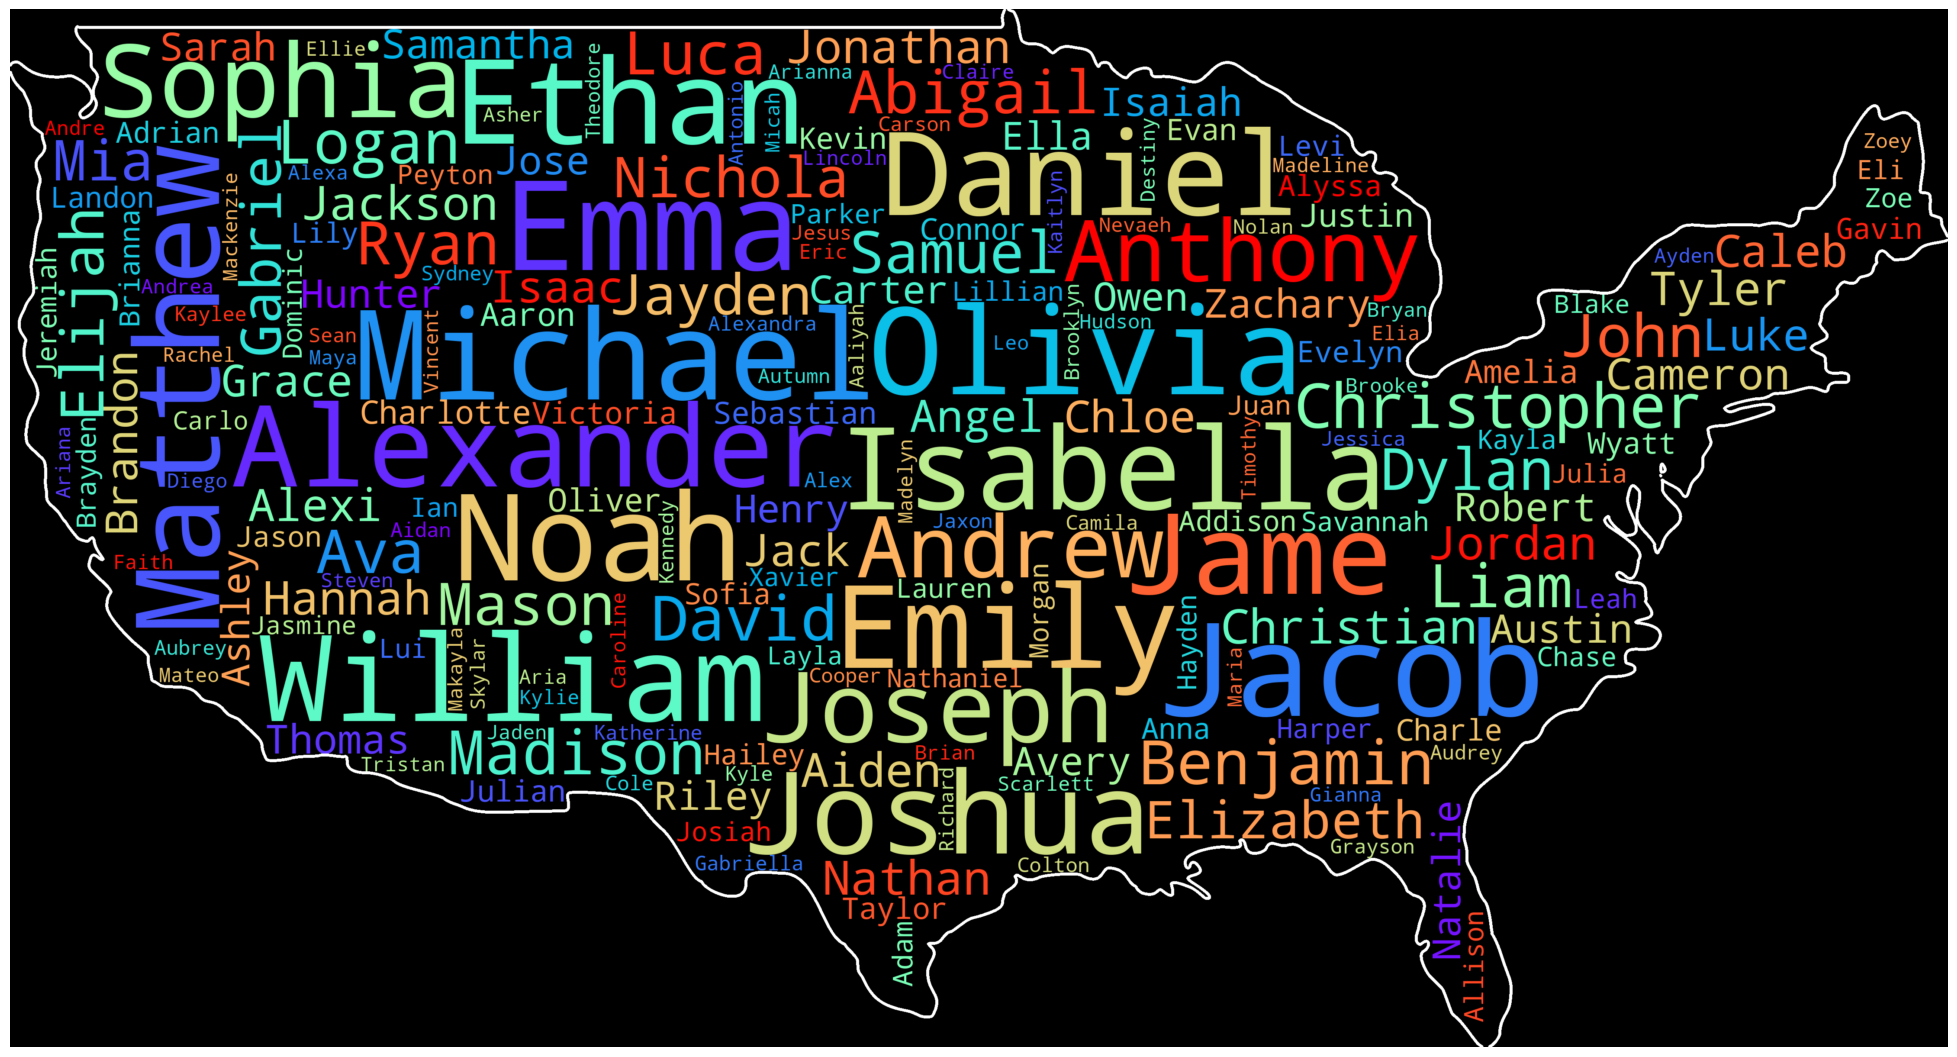

In [13]:
# Create and generate a wordcloud
wordcloud = WordCloud(max_font_size= 300, # maximum font size for the largest word
                      min_font_size= 40, # smallest font size to use
                      background_color= 'black', # background color for the wordcloud image
                      colormap= 'rainbow', # Matplotlib colormap to randomly draw colors from for each word
                      mask= usa_mask, # mask for using an image
                      contour_width= 9, # if there is a mask, draw the mask contour (border)
                      contour_color= 'white', # mask contour (border) color
                      collocations= False # whether to include collocations (bigrams) of two words
                     ).generate(name_text)


# Plot the wordcloud
plt.figure(figsize=[25,25]) # set the size of wordcloud
plt.imshow(wordcloud, interpolation= 'bilinear') # display the generated wordcloud
plt.axis('off') # not show the axis of plot
plt.show();

It seems like **Jacob**, **Emma** and **Micheal** are some of the most preferred names for newborns in the US between 2000 and 2023. 

## Conclusion
Generally, the size of each word in the cloud represents its frequency or importance in the text. Typically, the more frequently a word appears in the text, the larger it will appear in the word cloud.

Word clouds are helpful for quickly identifying key themes and ideas in a text.  Nice to keep in mind that they should be used in combination with other tools for deeper analysis and comprehensive understanding.